In [81]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (15, 10)

### Problem 1.

#### 1a)

For the background, we'll use 1 million points on a normal distribution with $\sigma=3$ and for the signal a uniform distribution for 0 to 20. 

In [82]:
bkgd = stats.norm.rvs(loc=0, scale=3, size=1000000)
signal = stats.uniform.rvs(loc=0, scale=20, size=1000000)

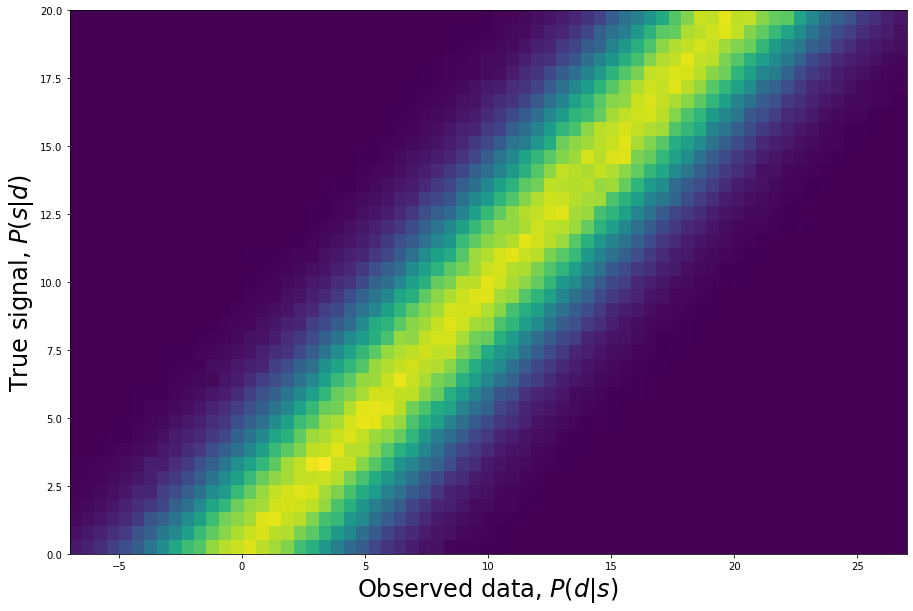

In [83]:
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T, shading='auto')
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()

#### 1b)

This plot shows what the probability is of observing some value, which is a combination of the background and the signal, given some known true signal, which is 10 in this case.

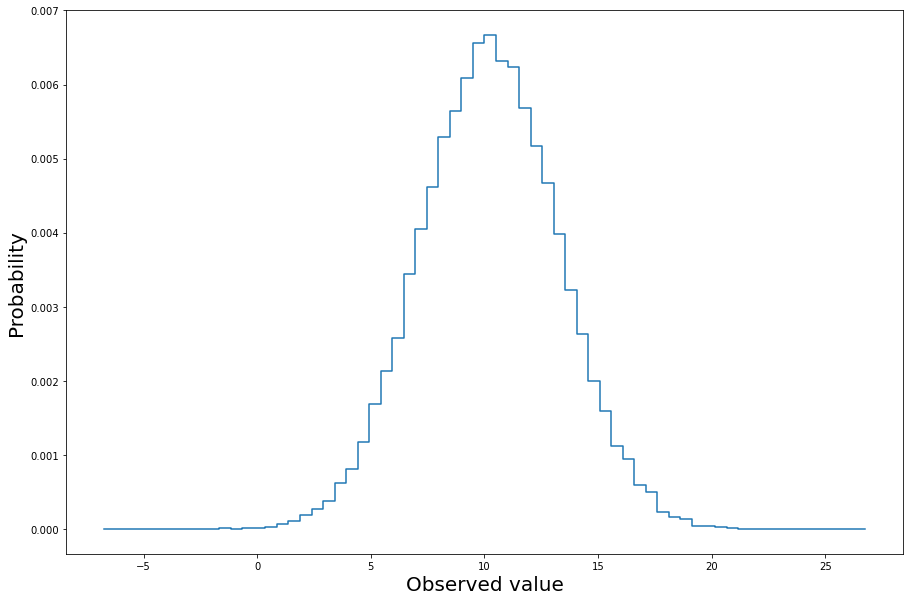

In [110]:
observed = 10

plt.step(datacenters, Psd[:,int(observed*2)])
plt.ylabel('Probability', fontsize=20)
plt.xlabel('Observed value', fontsize=20)
plt.show()

#### 1c)

This plot shows the probability of the signal being some value given some observation, in this case 10.

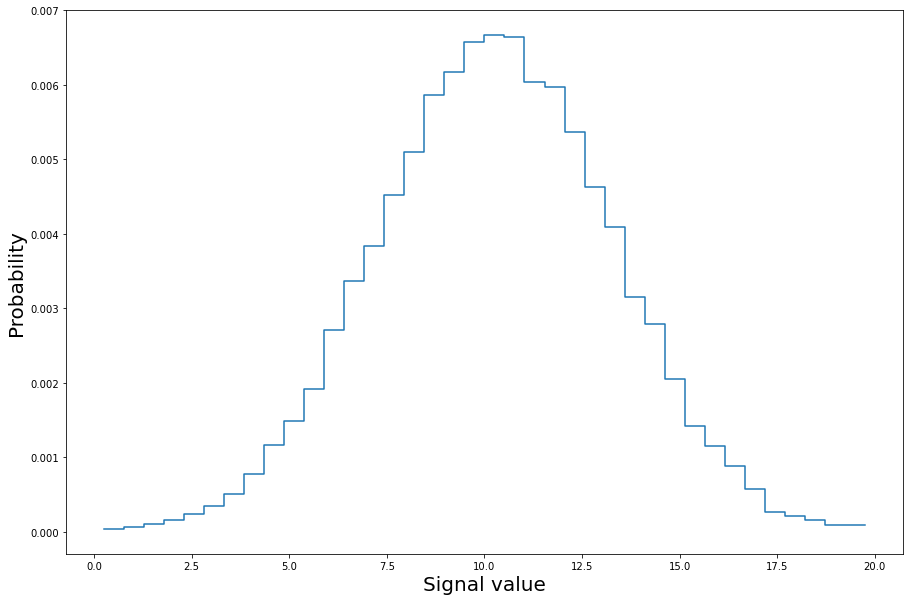

In [111]:
true = 10

plt.step(signalcenters, Psd[int(true*2) + 14, :])
plt.ylabel('Probability', fontsize=20)
plt.xlabel('Signal value', fontsize=20)
plt.show()

### Problem 2.

In [86]:
bkgd2 = stats.norm.rvs(loc=6, scale=3, size=1000000)
signal2 = stats.uniform.rvs(loc=0, scale=20, size=1000000)

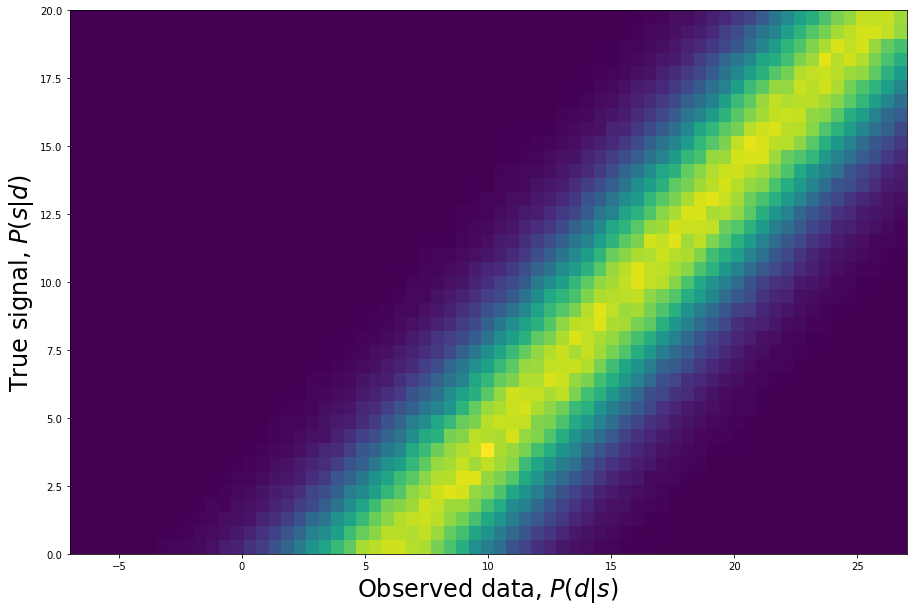

In [87]:
data2 = bkgd2 + signal2

signaledges2 = np.linspace(0,20,40)
dataedges2 = np.linspace(-7,27,68)

Psd2, temp, temp2= np.histogram2d(data2,signal2, bins=[dataedges2,signaledges2], density=True)

datacenters2 = (dataedges2[:-1] + dataedges2[1:]) / 2
signalcenters2 = (signaledges2[:-1] + signaledges2[1:]) / 2
plt.pcolormesh(datacenters2,signalcenters2,Psd2.T, shading='auto')
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()

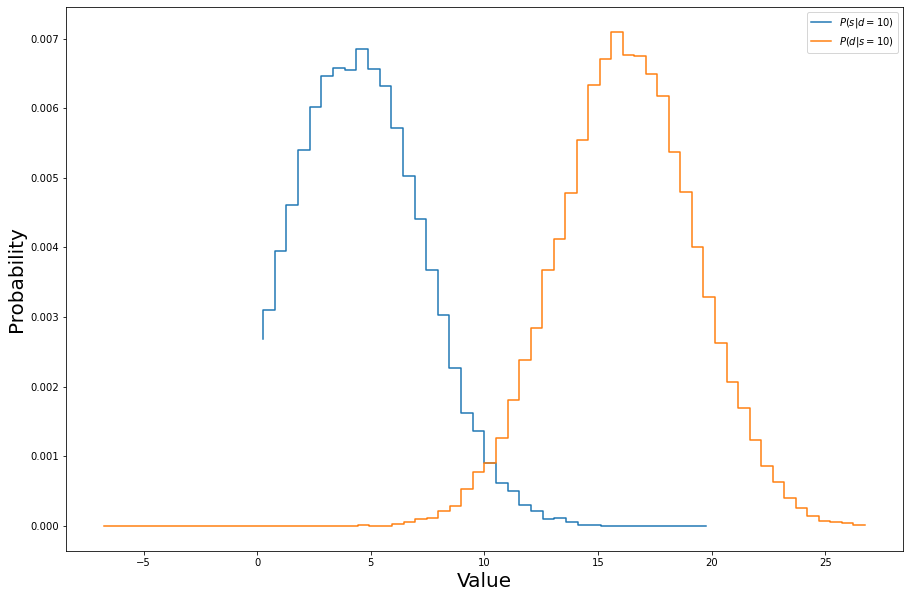

In [109]:
fig,ax = plt.subplots()

ax.step(signalcenters2, Psd2[int(true*2)+14, :], label='$P(s|d=10)$')
ax.set_ylabel('Probability', fontsize=20)
ax.set_xlabel('Value', fontsize=20)
ax.step(datacenters2, Psd2[:,int(observed*2)], label='$P(d|s=10)$')
plt.legend()
plt.show()

These two distributions are located at different points despite the chosen signal or data value for each being the same because the data is the signal plus the background. This means that if we observe a data value, it is unlikely that the signal value is significantly higher than that measured value, as the background would have to be some also unlikely negative value. A signal with a value less than the data would be very likely, as most of the distribution has a positive value since the mean is $2\sigma$ above 0, and the observed data value is the background plus the signal.  Conversely, if we start with a known signal value, it is very likely that the data will be a higher value than the signal for the same reason.